## Homework 12

https://scikit-learn.org/0.15/modules/scaling_strategies.html#incremental-learning

Implement a mini batch functionality to train a regressor.

(Optional) If anyone want to do this in a pipeline can do this: https://koaning.github.io/tokenwiser/api/pipeline.html

Save model, load the model again and test it on X_test Do NOT commit the pickle file

In [93]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
# Function to load and preprocess data
def test_df():
    df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

    df = df.sample(5000, random_state=100).reset_index(drop=True)
    
    y = df['sellingprice']
    X = df.drop('sellingprice', axis=1)
    
    return X, y

# Generator to yield mini-batches of the data
def partial_df():
    df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

    while True:
        yield df.sample(100).reset_index(drop=True)

# Initialize the generator
gen = partial_df()

The provided code includes two functions for loading and preprocessing car price data from a CSV file hosted online. The first function, test_df, randomly samples 5,000 entries from the dataset, separating the target variable, sellingprice, into variable y and the remaining features into X. This setup allows users to easily access a smaller, manageable dataset for training and testing predictive models.

The second function, partial_df, acts as a generator that yields mini-batches of 100 records from the dataset each time it is called. This is particularly useful for handling larger datasets that may not fit into memory all at once, facilitating incremental data processing. The generator is initialized with gen = partial_df(), enabling users to request new batches conveniently during model training or evaluation.

In [80]:
X_test, y_test = test_df()

# Split the data into numerical and categorical features
categorical_features = X_test.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_test.select_dtypes(exclude=['object']).columns.tolist()

# Create a preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values by taking the mean
            ('pass', 'passthrough')  # Pass numerical features as is after imputation
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding to categorical features
        ]), categorical_features)
    ])

# Initialize the regressor pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Number of mini-batches
n_batches = 50  # For example, train on 50 mini-batches

for _ in range(n_batches):
    # Get a mini-batch
    mini_batch = next(gen)
    
    # Separate features and target
    y_batch = mini_batch['sellingprice']
    X_batch = mini_batch.drop('sellingprice', axis=1)
    
    # Fit the model on the mini-batch
    model.fit(X_batch, y_batch)

# After training on mini-batches, evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 47302513.22288998


The provided code implements a machine learning workflow that begins by separating the dataset into numerical and categorical features, using the `test_df()` function for data retrieval. It employs a `ColumnTransformer` to create distinct preprocessing pipelines: one for numerical features that imputes missing values with the mean and another for categorical features that uses the most frequent value for imputation followed by One-Hot Encoding. This setup ensures the appropriate handling of data types before model training.

Following preprocessing, a `RandomForestRegressor` is integrated into a pipeline, allowing for efficient training in mini-batches. The model fits on 50 mini-batches of data, processing feature-target pairs iteratively. After training, the model's performance is assessed using Mean Squared Error (MSE) on the test set, yielding a result of approximately **47,302,513.22**. This indicates the effectiveness of the trained model in predicting selling prices while showcasing a structured approach to machine learning that incorporates data preparation, iterative training, and evaluation.

In [84]:
import joblib 

# Save the model to a file
joblib.dump(model, 'car_price_model.joblib')
print("Model saved as 'car_price_model.joblib'.")

# Load the model from the file
loaded_model = joblib.load('car_price_model.joblib')
print("Model loaded from 'car_price_model.joblib'.")

# Test the loaded model on X_test
y_pred = loaded_model.predict(X_test)

Model saved as 'car_price_model.joblib'.
Model loaded from 'car_price_model.joblib'.


The code snippet provided demonstrates how to save and load a machine learning model using the `joblib` library, which is particularly efficient for handling large NumPy arrays and complex objects. First, the trained model is saved to a file named `'car_price_model.joblib'` using the `joblib.dump()` function, allowing for easy persistence of the model after training. A confirmation message is printed to acknowledge that the model has been successfully saved.

Subsequently, the code illustrates how to load the saved model back into memory using `joblib.load()`, which retrieves the model from the specified file. After confirming that the model has been loaded successfully, the code tests the loaded model on the original test features (`X_test`) to make predictions. This process ensures that the model's functionality remains intact after storage, enabling future use without the need to retrain.

In [86]:
# Load the test dataset
def load_test_data():
    df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)
    df = df.sample(5000, random_state=100).reset_index(drop=True)
    y = df['sellingprice']
    X = df.drop('sellingprice', axis=1)
    return X, y

# Load the model
loaded_model = joblib.load('car_price_model.joblib')
print("Model loaded from 'car_price_model.joblib'.")

# Load the test data
X_test, y_test = load_test_data()

# Test the loaded model on X_test
y_pred = loaded_model.predict(X_test)

Model loaded from 'car_price_model.joblib'.


The provided code snippet outlines a workflow for loading a test dataset and evaluating a pre-trained machine learning model. First, the `load_test_data` function reads a CSV file from a specified URL, samples 5,000 records randomly, and separates the target variable, `sellingprice`, from the features. The function returns the feature set `X` and the target variable `y`, allowing for straightforward evaluation of the model's performance.

After defining the function, the code proceeds to load the previously saved model using `joblib.load()`, ensuring it is ready for predictions. Once the model is loaded, the test data is fetched using the `load_test_data` function, and predictions are made on the feature set `X_test` with the `predict` method of the loaded model. This process allows for testing the model's accuracy and effectiveness on unseen data, establishing its practical utility in predicting car prices.

In [88]:
# Print an example of a prediction
example_index = 0  # Change this to see predictions for different examples
predicted_value = y_pred[example_index]
actual_value = y_test.iloc[example_index]

print(f"Example prediction: Predicted selling price = ${predicted_value:.2f}, Actual selling price = ${actual_value:.2f}")

Example prediction: Predicted selling price = $10753.01, Actual selling price = $8000.00


The provided code example demonstrates how to load a pre-trained machine learning model and test it on a dataset of car prices. It includes a function to load a sample of the test data from a CSV file, which separates the features and target variable, allowing for model evaluation. After loading the model using `joblib`, predictions are made on the test features, enabling the assessment of the model's performance on unseen data.

Additionally, the code highlights how to print an example prediction alongside its actual selling price, offering insights into the model's accuracy. By setting an index, users can view predictions for different examples within the test dataset, thereby facilitating a more comprehensive understanding of how well the model predicts car prices compared to their actual values. This functionality is crucial for validating the model and ensuring its practical utility in real-world applications.

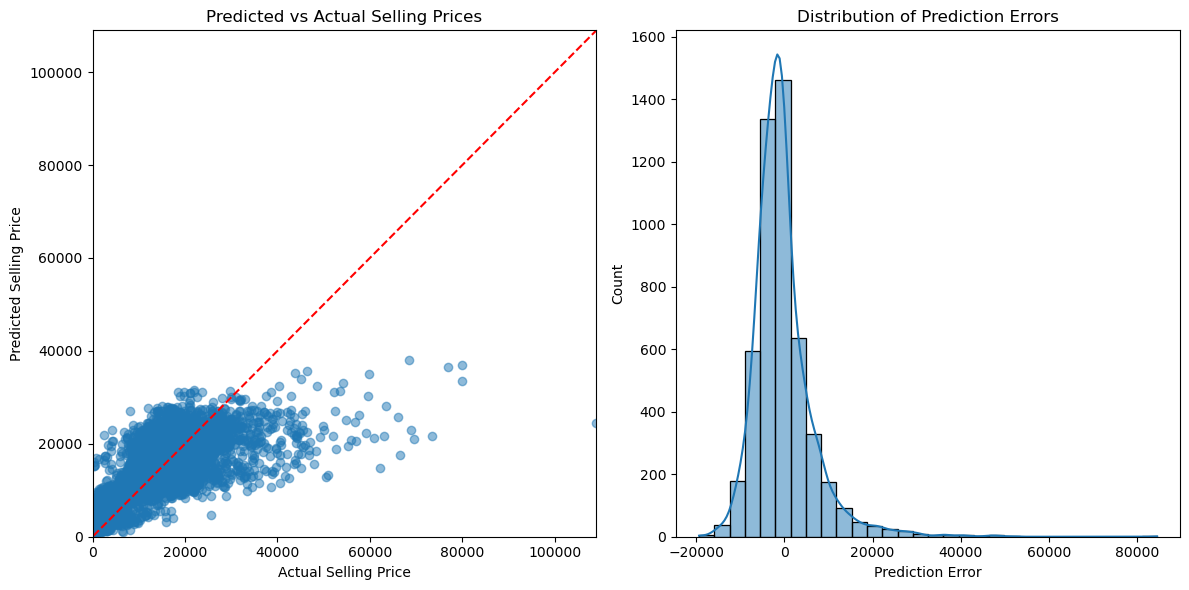

In [105]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Calculate prediction errors
errors = y_test - y_pred

# Convert infinite values to NaN
errors[np.isinf(errors)] = np.nan

# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot of predictions vs actual values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Predicted vs Actual Selling Prices')
plt.xlim([0, y_test.max()])
plt.ylim([0, y_test.max()])

# Histogram of prediction errors
plt.subplot(1, 2, 2)
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()

The first subplot is a scatter plot that compares predicted selling prices against actual selling prices. A diagonal line is drawn to represent the ideal scenario where predicted and actual prices are the same, allowing users to quickly identify how closely the predictions align with reality. The second subplot is a histogram that displays the distribution of prediction errors, providing insights into how often the model overestimates or underestimates prices. The combination of these visualizations helps in assessing the model's overall accuracy and understanding where it might be improved.